In [11]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import IPython.display as display
%matplotlib inline

In [6]:
# 读TF文件
file_pattern = "./data/floortile.tfrecord"

filenames= [file_pattern]
raw_dataset = tf.data.TFRecordDataset(filenames)
raw_dataset

<TFRecordDatasetV2 shapes: (), types: tf.string>

In [7]:
for raw_record in raw_dataset.take(10):
  print(repr(raw_record))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# 解析文件
feature_description = {
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/filename': tf.io.FixedLenFeature([], tf.string),
    'image/source_id': tf.io.FixedLenFeature([], tf.string),
    'image/key/sha256': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
    'image/format': tf.io.FixedLenFeature([], tf.string),
    'image/object/bbox/xmin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymin': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/xmax': tf.io.VarLenFeature(tf.float32),
    'image/object/bbox/ymax': tf.io.VarLenFeature(tf.float32),
    'image/object/class/text': tf.io.VarLenFeature(tf.string),
    'image/object/class/label': tf.io.VarLenFeature(tf.int64),
}

def _parse_function(example_proto):
    # Parse the input `tf.Example` proto using the dictionary above.
    return tf.io.parse_single_example(example_proto, feature_description)


parsed_dataset = raw_dataset.map(_parse_function)
parsed_dataset

<MapDataset shapes: {image/object/bbox/xmax: (None,), image/object/bbox/xmin: (None,), image/object/bbox/ymax: (None,), image/object/bbox/ymin: (None,), image/object/class/label: (None,), image/object/class/text: (None,), image/encoded: (), image/filename: (), image/format: (), image/height: (), image/key/sha256: (), image/source_id: (), image/width: ()}, types: {image/object/bbox/xmax: tf.float32, image/object/bbox/xmin: tf.float32, image/object/bbox/ymax: tf.float32, image/object/bbox/ymin: tf.float32, image/object/class/label: tf.int64, image/object/class/text: tf.string, image/encoded: tf.string, image/filename: tf.string, image/format: tf.string, image/height: tf.int64, image/key/sha256: tf.string, image/source_id: tf.string, image/width: tf.int64}>

In [10]:
# 查看
for parsed_record in parsed_dataset.take(10):
  print(repr(parsed_record))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



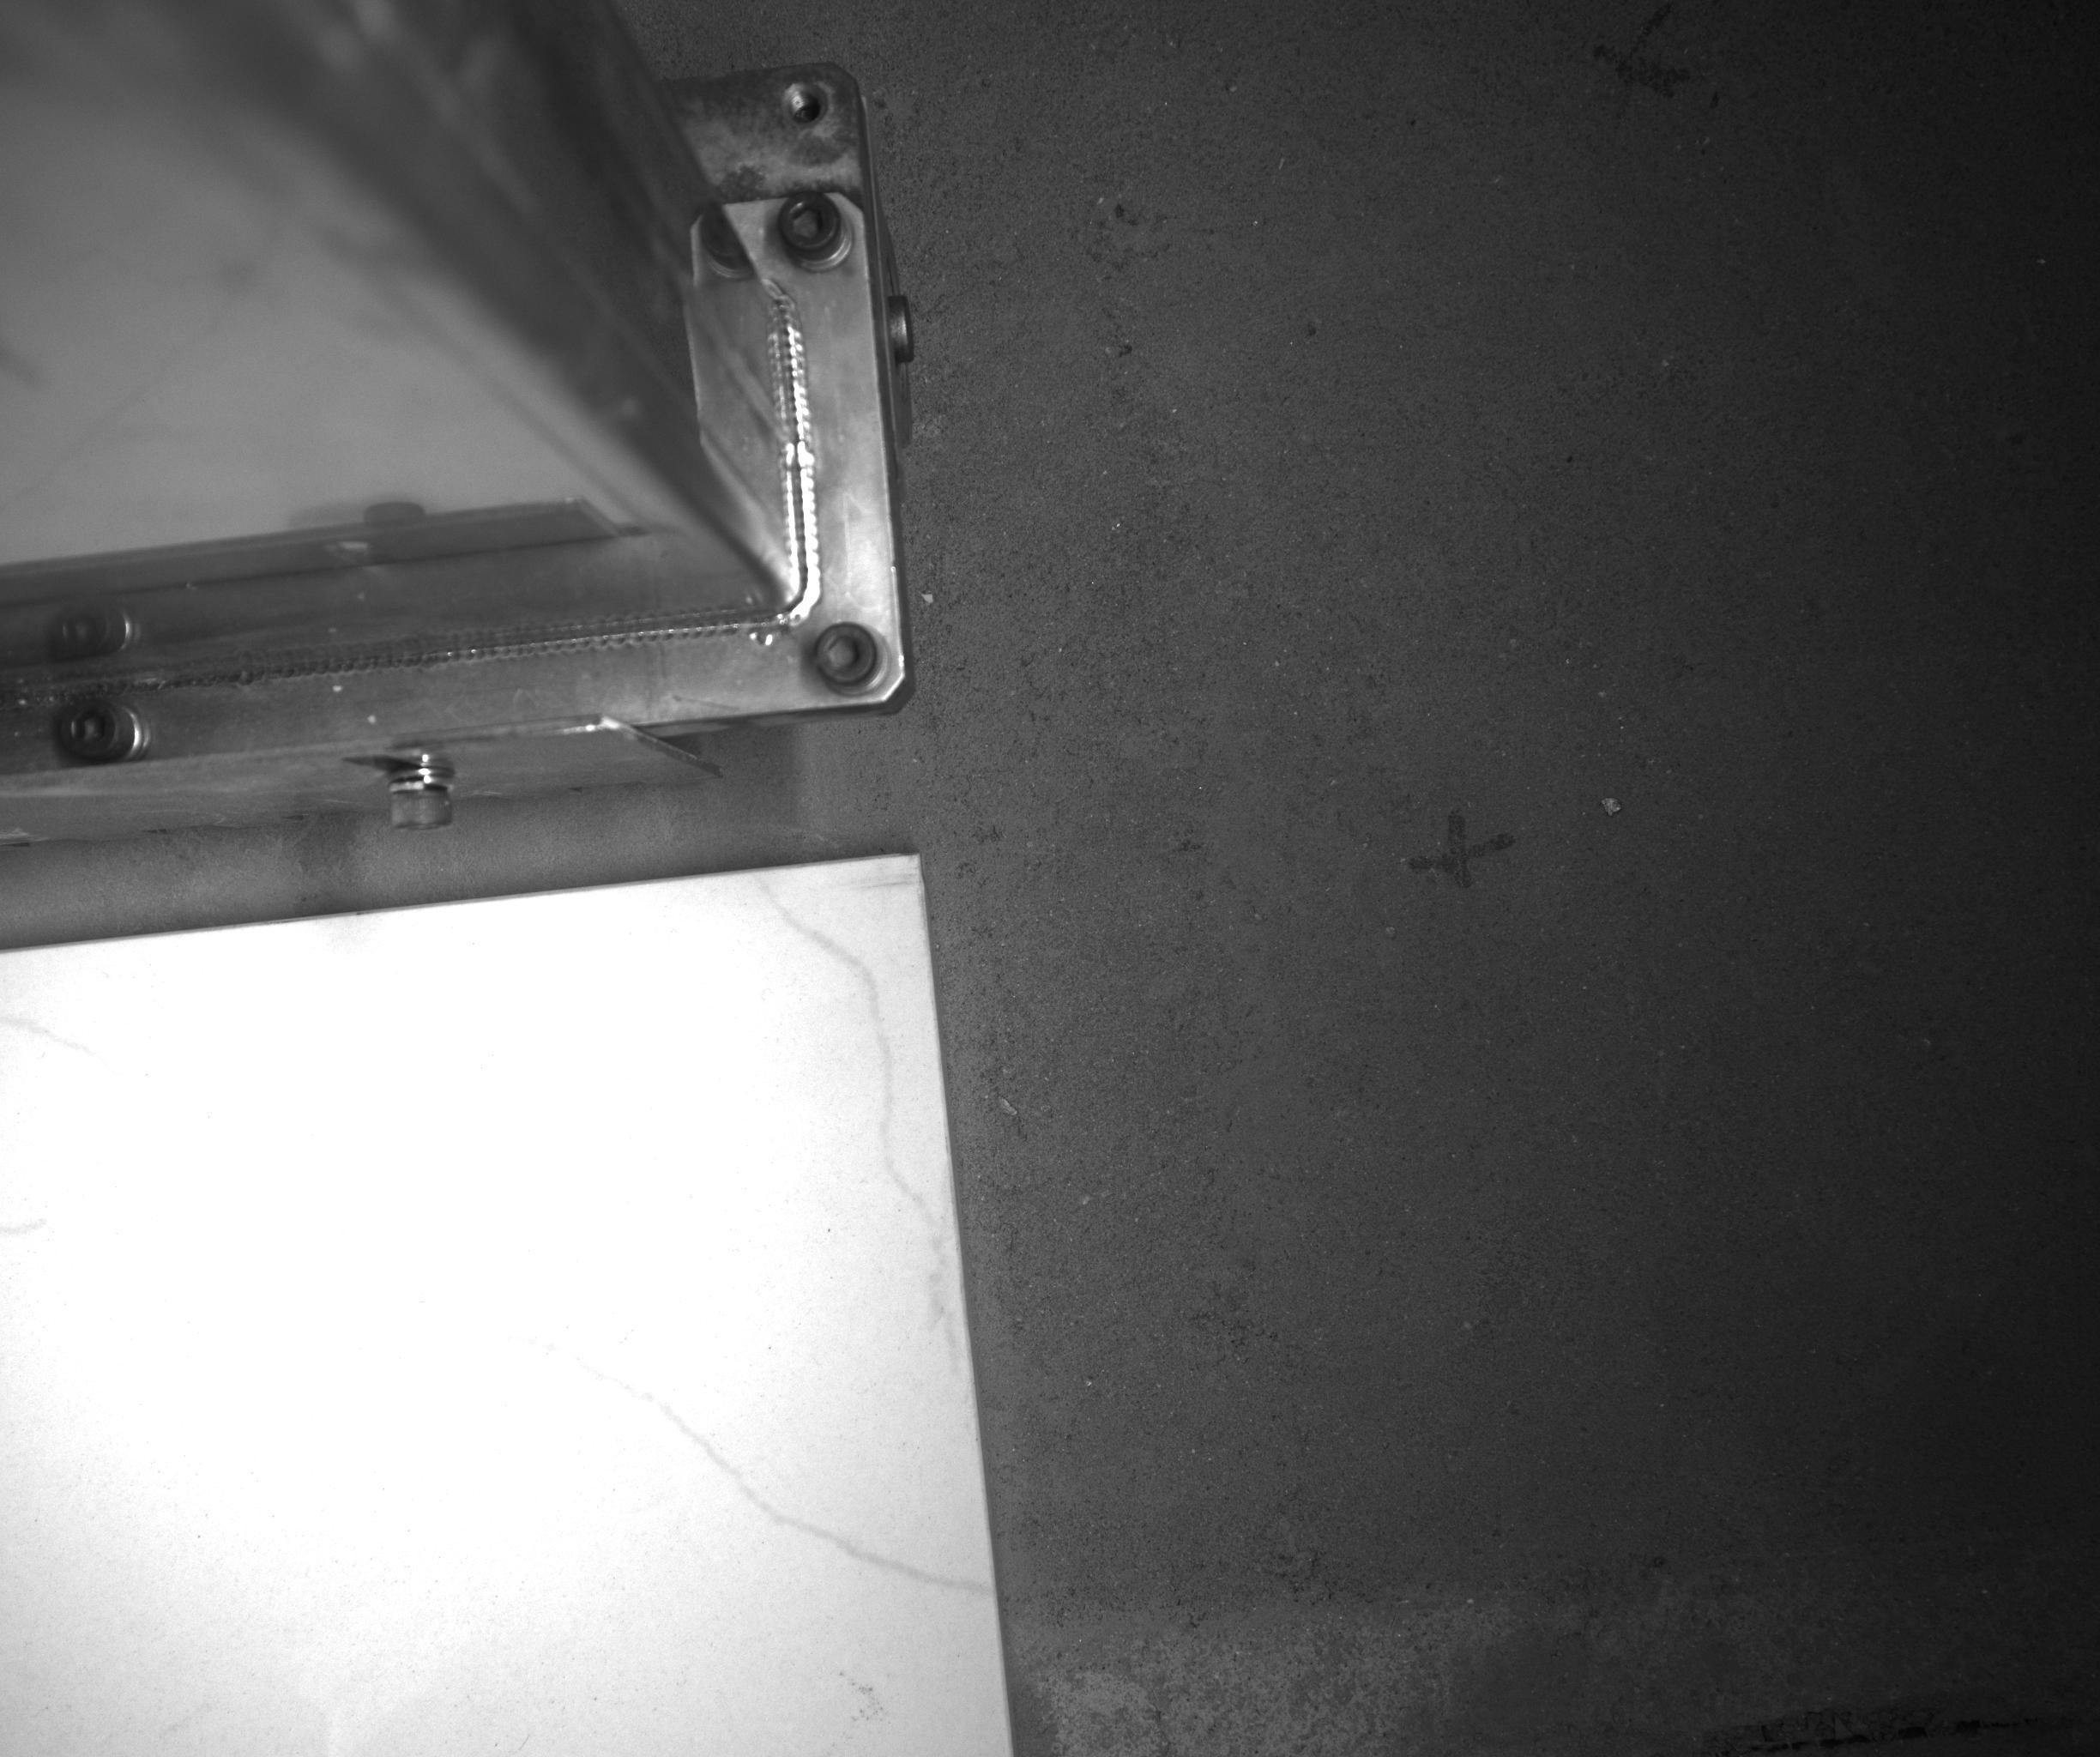

(array([0.40645424, 0.43770424], dtype=float32), array([0.49023438, 0.52197266], dtype=float32)) (array([0.08006536, 0.02655229], dtype=float32), array([0.02441406, 0.0859375 ], dtype=float32))


In [18]:
for image_features in parsed_dataset:
    image_raw = image_features['image/encoded'].numpy()
    display.display(display.Image(data=image_raw))
    x_min = tf.sparse.to_dense(image_features['image/object/bbox/xmin']).numpy()
    y_min = tf.sparse.to_dense(image_features['image/object/bbox/ymin']).numpy()
    x_max = tf.sparse.to_dense(image_features['image/object/bbox/xmax']).numpy()
    y_max = tf.sparse.to_dense(image_features['image/object/bbox/ymax']).numpy()
    print((x_min, y_min), (x_max, y_max))
    break